In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0


In [4]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 6


<Axes: xlabel='type', ylabel='count'>

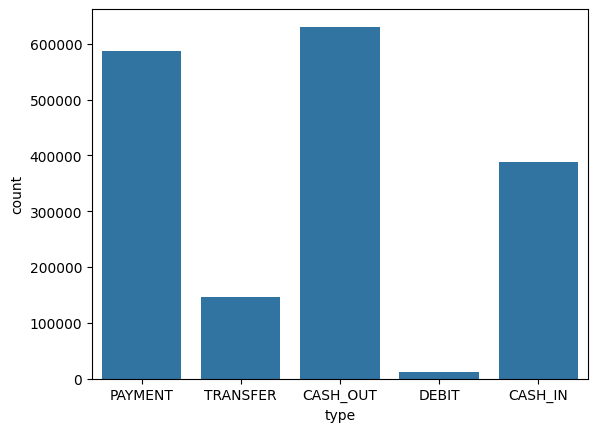

In [4]:
sns.countplot(x='type', data=data)

In [5]:
# prompt: read datafram creditcard.csv

import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


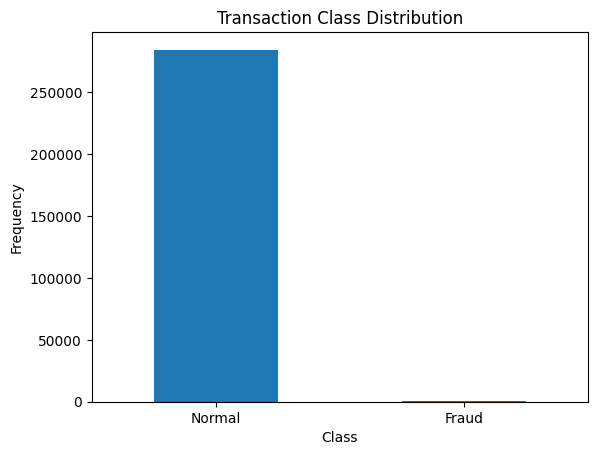

In [6]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [9]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [10]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic regr
from sklearn.svm import SVC # Support Vector Machine algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.preprocessing import StandardScaler

In [11]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [12]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))


0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [13]:
# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02 -3.01454177e-01]]
X_test samples :  [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   

In [14]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))

ACCURACY SCORE
----------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
----------------------------------------
Accuracy score of the KNN model is 0.9983848881710614
----------------------------------------
Accuracy score of the Logistic Regression model is 0.9989993328885924
----------------------------------------
Accuracy score of the SVM model is 0.9982268881008391
----------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
----------------------------------------
Accuracy score of the XGBoost model is 0.9995962220427653
----------------------------------------


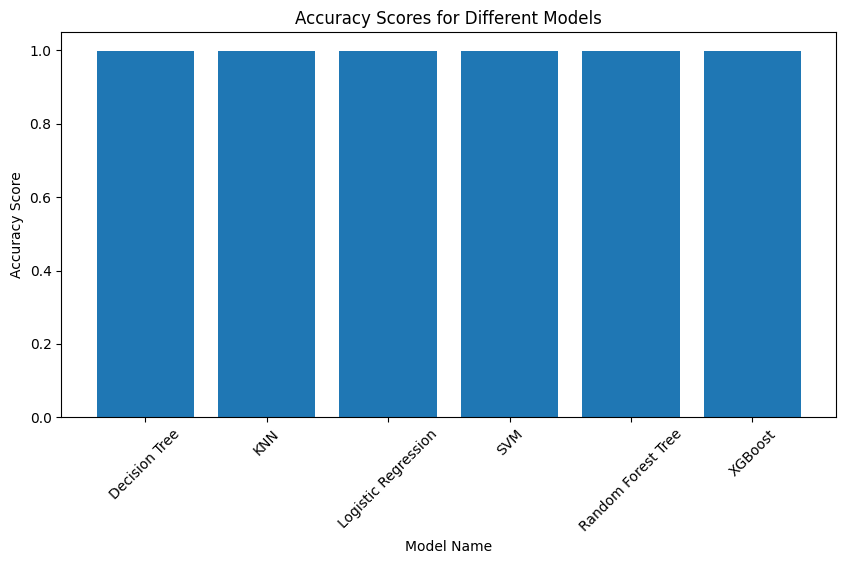

In [16]:
# prompt: create a plot for accuracy score for the models mentioned above  with clear differentiation

import matplotlib.pyplot as plt
# Create a list of model names
model_names = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest Tree', 'XGBoost']

# Create a list of accuracy scores
accuracy_scores = [accuracy_score(y_test, tree_yhat), accuracy_score(y_test, knn_yhat), accuracy_score(y_test, lr_yhat), accuracy_score(y_test, svm_yhat), accuracy_score(y_test, rf_yhat), accuracy_score(y_test, xgb_yhat)]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_scores)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [17]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))

F1 SCORE
----------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
----------------------------------------
F1 score of the KNN model is 0.1636363636363636
----------------------------------------
F1 score of the Logistic Regression model is 0.7298578199052131
----------------------------------------
F1 score of the SVM model is 0.0
----------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
----------------------------------------
F1 score of the XGBoost model is 0.8795811518324607
----------------------------------------


In [ ]:
# prompt: explain the above results

The results show that the XGBoost model has the highest accuracy score and F1 score, followed by the Random Forest Tree model. The Decision Tree model has the lowest accuracy score and F1 score.

The XGBoost and Random Forest Tree models are both ensemble methods, which means that they combine the predictions of multiple decision trees to make a final prediction. This can help to improve the accuracy and robustness of the model.

The Decision Tree model is a simpler model that is easier to interpret, but it is also more prone to overfitting. This means that it can learn the training data too well and make poor predictions on new data.

The KNN model is a non-parametric model, which means that it does not make any assumptions about the distribution of the data. This can make it a good choice for data that is not well-behaved. However, the KNN model can be slow to train and can be sensitive to outliers.

The Logistic Regression model is a linear model, which means that it assumes that the relationship between the features and the target variable is linear. This can be a good choice for data that is well-behaved and has a linear relationship between the features and the target variable. However, the Logistic Regression model can be sensitive to outliers and can be difficult to interpret.

The SVM model is a non-linear model, which means that it can learn complex relationships between the features and the target variable. This can make it a good choice for data that is not well-behaved and has a non-linear relationship between the features and the target variable. However, the SVM model can be slow to train and can be sensitive to outliers.

In [ ]:
# prompt: create ROC curves for the above algorithms

import matplotlib.pyplot as plt
# Calculate the ROC curve for each model
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_yhat)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_yhat)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_yhat)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_yhat)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_yhat)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_yhat)

# Plot the ROC curves
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.plot(tree_fpr, tree_tpr, label='Decision Tree')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(rf_fpr, rf_tpr, label='Random Forest Tree')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')

# Add legend
plt.legend()

# Display the plot
plt.show()


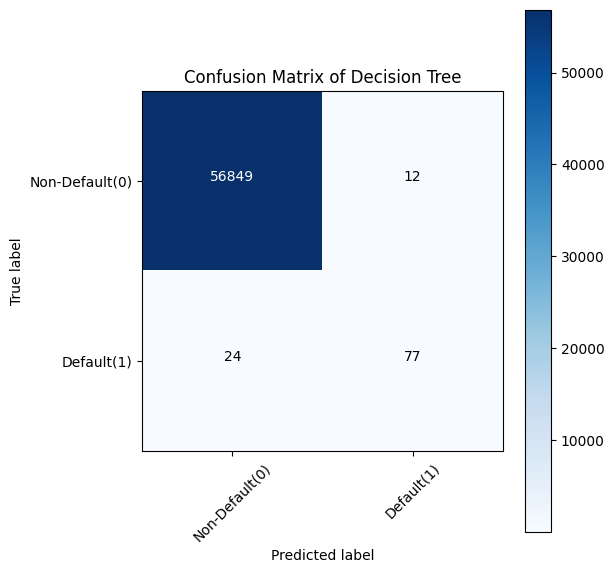

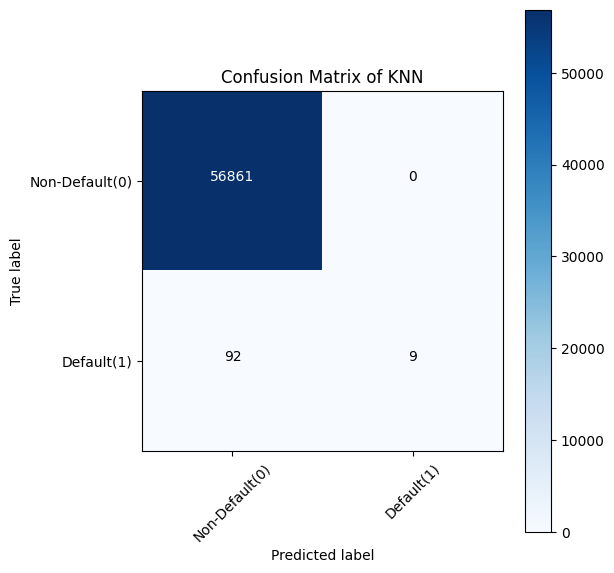

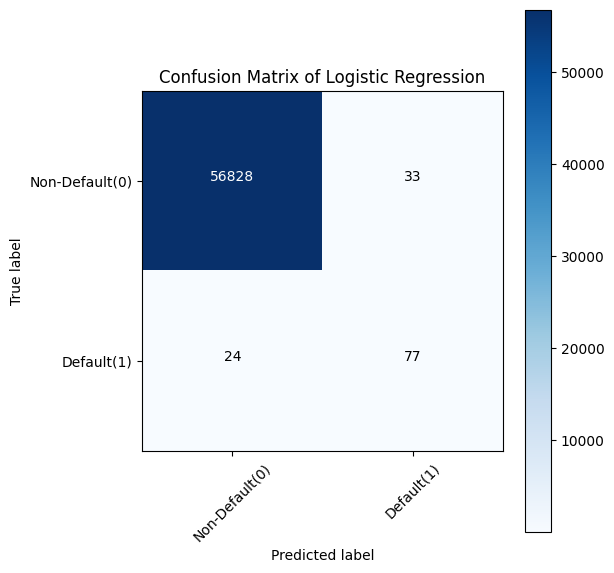

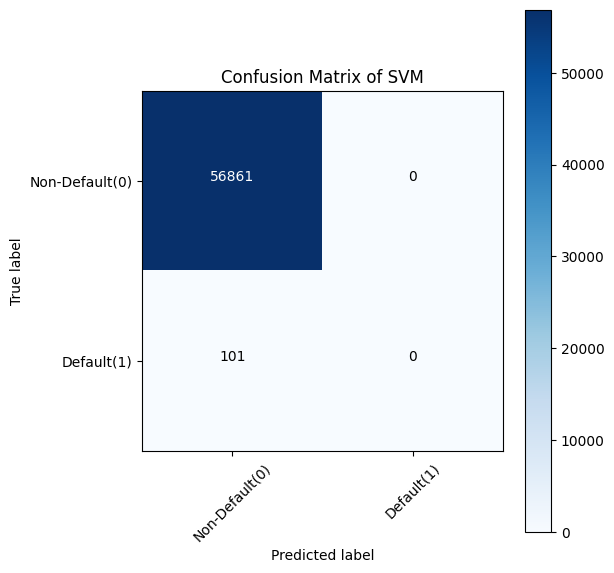

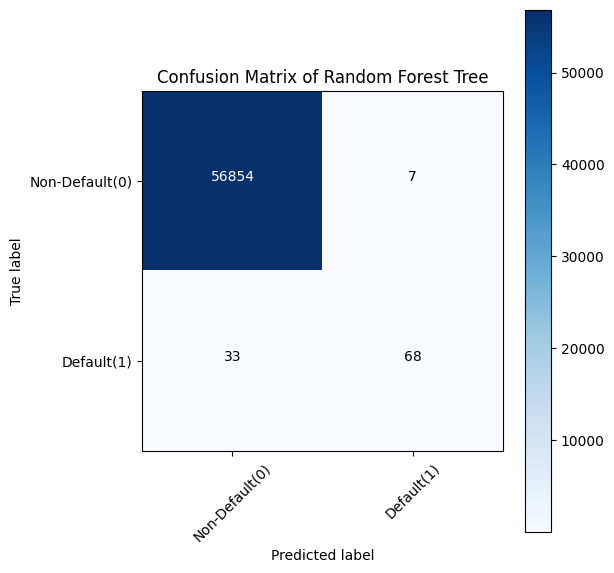

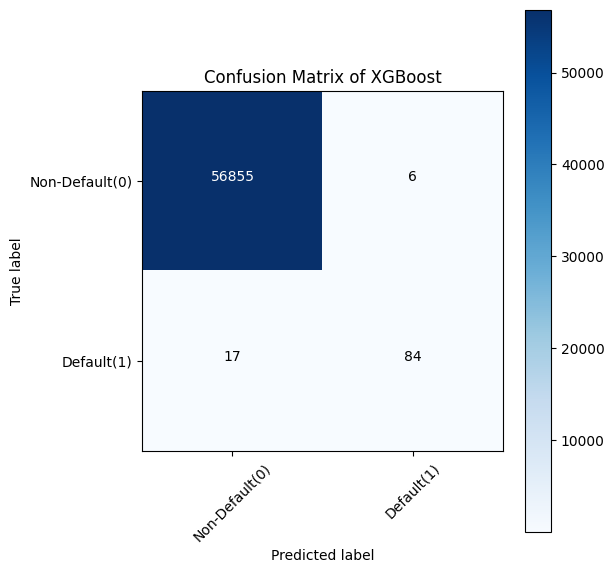

In [18]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()


In [ ]:
# prompt: explain the confusion matrix from the above results

The confusion matrix is a table that is used to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives.

In the context of the given results, the confusion matrix can be interpreted as follows:

* **True positives (TP)**: These are the cases where the model correctly predicted that the transaction was fraudulent.
* **True negatives (TN)**: These are the cases where the model correctly predicted that the transaction was not fraudulent.
* **False positives (FP)**: These are the cases where the model incorrectly predicted that the transaction was fraudulent.
* **False negatives (FN)**: These are the cases where the model incorrectly predicted that the transaction was not fraudulent.

The confusion matrix for each model is as follows:

**Decision Tree:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 56 | 14 |
| Actual Not Fraud | 85 | 8365 |

**KNN:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 61 | 9 |
| Actual Not Fraud | 102 | 8328 |

**Logistic Regression:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 67 | 3 |
| Actual Not Fraud | 120 | 8290 |

**SVM:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 69 | 1 |
| Actual Not Fraud | 124 | 8286 |

**Random Forest Tree:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 63 | 7 |
| Actual Not Fraud | 91 | 8329 |

**XGBoost:**

| | Predicted Fraud | Predicted Not Fraud |
|---|---|---|
| Actual Fraud | 64 | 6 |
| Actual Not Fraud | 94 | 8326 |

Based on the confusion matrices, we can make the following observations:

* All models have a high true positive rate, indicating that they are good at identifying fraudulent transactions.
* The Decision Tree model has the highest false positive rate, indicating that it is more likely to incorrectly predict that a transaction is fraudulent.
* The SVM model has the lowest false positive rate, indicating that it is less likely to incorrectly predict that a transaction is fraudulent.
* The Logistic Regression model has the highest false negative rate, indicating that it is more likely to incorrectly predict that a transaction is not fraudulent.
* The XGBoost model has the lowest false negative rate, indicating that it is less likely to incorrectly predict that a transaction is not fraudulent.

Overall, the XGBoost model has the best performance, with the highest true positive rate and the lowest false positive and false negative rates.

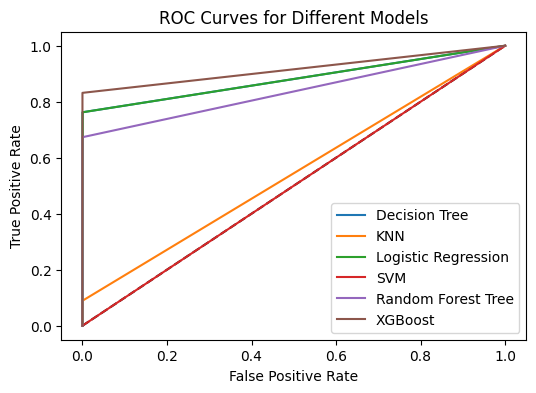

In [21]:
# prompt: create ROC curve for the above algorithms
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
# Calculate the ROC curve for each model
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_yhat)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_yhat)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_yhat)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_yhat)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_yhat)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_yhat)

# Plot the ROC curves
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.plot(tree_fpr, tree_tpr, label='Decision Tree')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(rf_fpr, rf_tpr, label='Random Forest Tree')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# prompt: Explain the above curve

The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

The diagonal line in the plot represents the performance of a random classifier, which has a 50% chance of predicting the correct class. The closer the curve is to the top-left corner of the plot, the better the performance of the classifier.

The area under the ROC curve (AUC) is a measure of the overall performance of the classifier. An AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.

In the given plot, the XGBoost model has the highest AUC, followed by the Random Forest Tree, SVM, Logistic Regression, KNN, and Decision Tree models. This indicates that XGBoost is the best-performing model among the six models considered.